In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'TMDB_movie_dataset_v11.csv'  
df = pd.read_csv(file_path)

In [2]:
# 1. Initial Inspection
print("Initial Dataset Shape:", df.shape)
print("\nDataset Preview:")
print(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())


Initial Dataset Shape: (1138344, 24)

Dataset Preview:
       id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path  ...  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  ...   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  ...   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  ...   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  ...   

    original_title                   

In [3]:
# 2. Handle Duplicates
if df.duplicated().sum() > 0:
    print(f"\nFound {df.duplicated().sum()} duplicate rows. Removing them.")
    df = df.drop_duplicates()


Found 368 duplicate rows. Removing them.


In [4]:
# 3. Handle Missing Data
# Identify columns with missing values
missing_cols = df.columns[df.isnull().any()]

# Display percentage of missing data
missing_percentage = df[missing_cols].isnull().mean() * 100
print("\nMissing Data Percentage by Column:")
print(missing_percentage)

# Drop or fill missing data as appropriate
for col in missing_cols:
    if missing_percentage[col] > 50  and col not in ['keywords', 'production_companies']:  # Drop columns with more than 50% missing data and preserve some columns planned for certain tasks
        print(f"Dropping column {col} due to excessive missing data.")
        df = df.drop(columns=[col])
    else:  
        if df[col].dtype != 'object':  # Only fill missing values for numerical columns
            df[col] = df[col].fillna(df[col].median())


Missing Data Percentage by Column:
title                    0.001142
release_date            16.466252
backdrop_path           73.417981
homepage                89.410761
imdb_id                 46.971817
original_title           0.001142
overview                20.309831
poster_path             31.537836
tagline                 85.980987
genres                  40.091795
production_companies    54.881737
production_countries    44.318597
spoken_languages        42.628667
keywords                72.921661
dtype: float64
Dropping column backdrop_path due to excessive missing data.
Dropping column homepage due to excessive missing data.
Dropping column tagline due to excessive missing data.


In [5]:
# 4. Validate Data Integrity
print("\nData Summary After Cleaning:")
print(df.describe())

# 5. Reserve Final Test Set
# Split the dataset into a working dataset and a reserved test set
df_working, df_final_test = train_test_split(df, test_size=0.2, random_state=42)


Data Summary After Cleaning:
                 id  vote_average    vote_count       revenue       runtime  \
count  1.137976e+06  1.137976e+06  1.137976e+06  1.137976e+06  1.137976e+06   
mean   7.414393e+05  1.878058e+00  1.884836e+01  6.912222e+05  4.774316e+01   
std    3.963005e+05  3.020478e+00  3.183239e+02  1.794221e+07  6.167211e+01   
min    2.000000e+00  0.000000e+00  0.000000e+00 -1.200000e+01 -2.800000e+01   
25%    4.112558e+05  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    7.463395e+05  0.000000e+00  0.000000e+00  0.000000e+00  2.300000e+01   
75%    1.093259e+06  4.750000e+00  1.000000e+00  0.000000e+00  8.900000e+01   
max    1.393751e+06  1.000000e+01  3.449500e+04  3.000000e+09  1.440000e+04   

             budget    popularity  
count  1.137976e+06  1.137976e+06  
mean   2.682445e+05  1.234246e+00  
std    5.072167e+06  7.582725e+00  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  6.000000e-01  
50%    0.000000e+00  6.000000e-01  
75%   

In [6]:
# Save the reserved test set
test_set_path = 'final_test_set.csv'
df_final_test.to_csv(test_set_path, index=False)
print(f"\nFinal test set saved to {test_set_path}. Shape: {df_final_test.shape}")

# Save the cleaned working dataset for analysis
working_set_path = 'cleaned_working_dataset.csv'
df_working.to_csv(working_set_path, index=False)
print(f"Cleaned working dataset saved to {working_set_path}. Shape: {df_working.shape}")


Final test set saved to final_test_set.csv. Shape: (227596, 21)
Cleaned working dataset saved to cleaned_working_dataset.csv. Shape: (910380, 21)


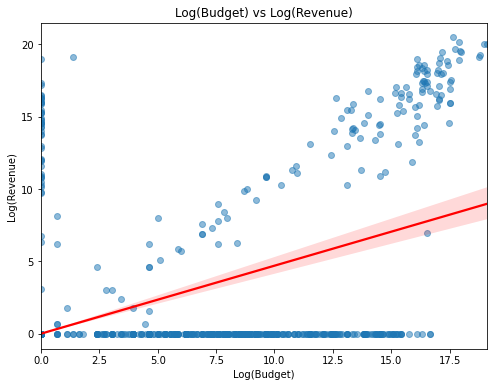

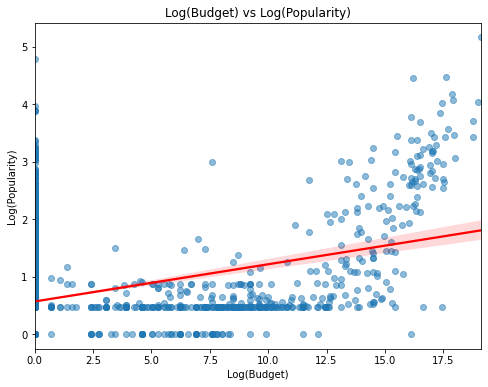

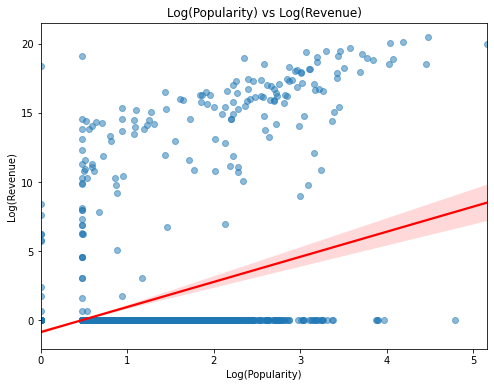

In [10]:
df = df.sample(n=10000, random_state=42)
# Log transformation to handle skewed data and zeros
df['log_budget'] = np.log1p(df['budget'])  
df['log_revenue'] = np.log1p(df['revenue'])  
df['log_popularity'] = np.log1p(df['popularity'])  

# Budget vs Revenue with trendline
plt.figure(figsize=(8, 6))
sns.regplot(x='log_budget', y='log_revenue', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})  
# Trendline (red) shows the relationship
plt.title("Log(Budget) vs Log(Revenue)")
plt.xlabel("Log(Budget)")
plt.ylabel("Log(Revenue)")
plt.show()

# Budget vs Popularity with trendline
plt.figure(figsize=(8, 6))
sns.regplot(x='log_budget', y='log_popularity', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title("Log(Budget) vs Log(Popularity)")
plt.xlabel("Log(Budget)")
plt.ylabel("Log(Popularity)")
plt.show()

# Popularity vs Revenue with trendline
plt.figure(figsize=(8, 6))
sns.regplot(x='log_popularity', y='log_revenue', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title("Log(Popularity) vs Log(Revenue)")
plt.xlabel("Log(Popularity)")
plt.ylabel("Log(Revenue)")
plt.show()

